In [1]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data
heart_f = pd.read_csv("heart.csv")

In [3]:
heart_f.head()
#categorical str- Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
#psuedo-cat -FastingBS
#target -HeartDisease
#numerical-Age,cholestrol,Oldpeak

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_f.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


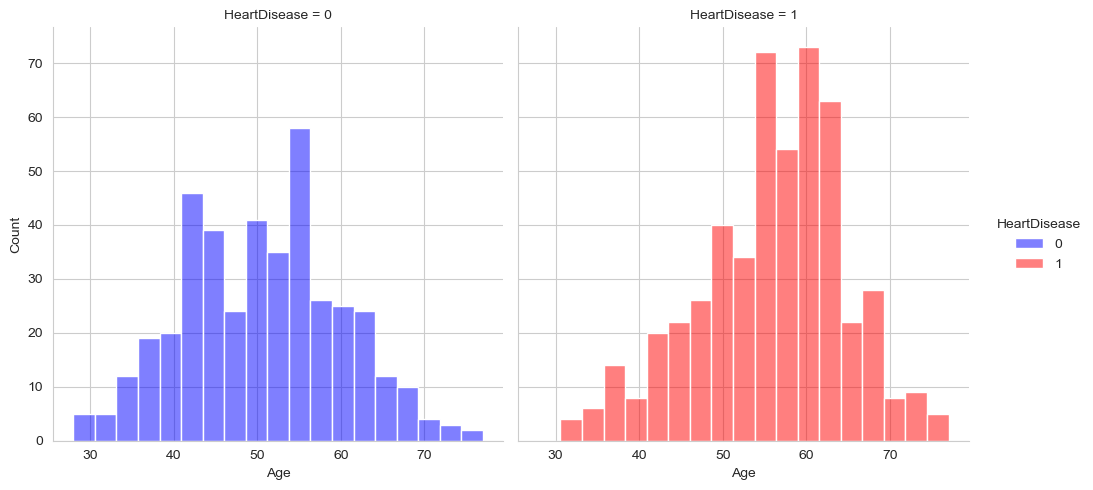

In [6]:
#data visualization
#numerical columns
sns.set_style("whitegrid")
facet_kws = {"hue": "HeartDisease", "palette": {0: "blue", 1: "red"}}
sns.displot(x="Age",col="HeartDisease",data=heart_f,alpha=0.5,**facet_kws)
#people with heart disease peak around 55-65 while other category is evenly divided

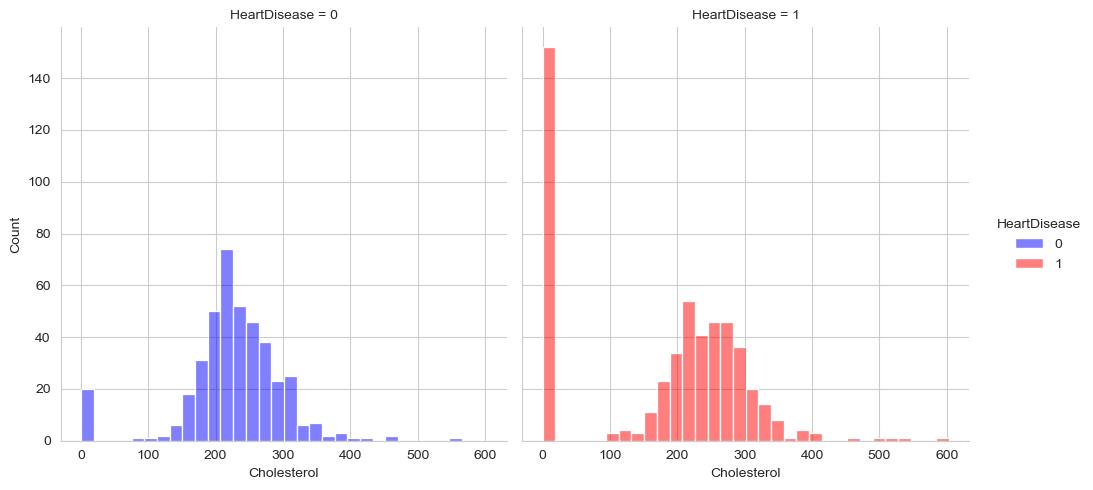

In [7]:
facet_kws = {"hue":"HeartDisease","palette": {0:"blue",1:"red"}}
sns.displot(x="Cholesterol",data=heart_f,alpha=0.5,**facet_kws,col="HeartDisease")
#similar plots for both 0,1 classes

<Axes: xlabel='HeartDisease', ylabel='count'>

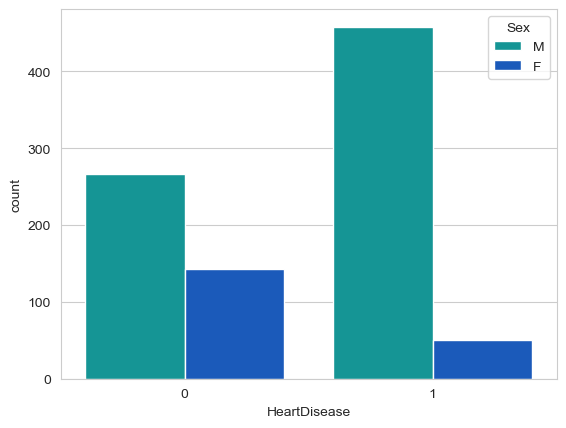

In [8]:
#categorical, checking how target changes for categorical columns
sns.countplot(x="HeartDisease",data=heart_f,hue="Sex",palette="winter_r")
#much more men are seen in 1(positive for heart_disease) caetgory

<Axes: xlabel='HeartDisease', ylabel='count'>

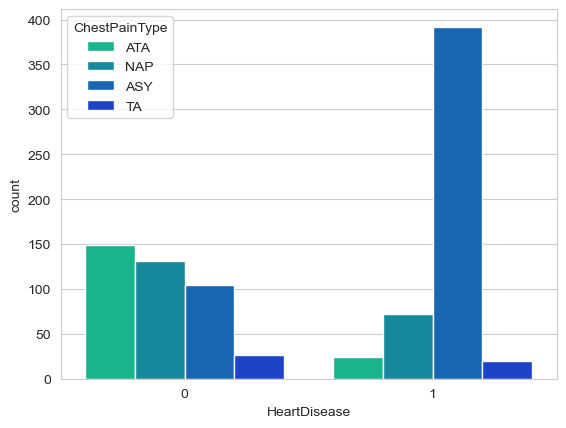

In [9]:
sns.countplot(x="HeartDisease",data=heart_f,hue="ChestPainType",palette="winter_r")
#ASY chestpain is very common in people with heart diseases

<Axes: xlabel='HeartDisease', ylabel='count'>

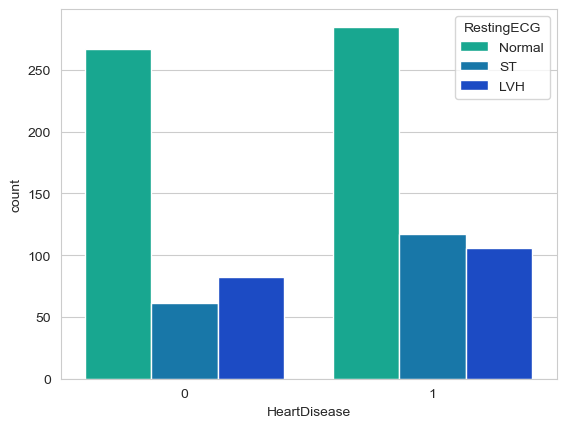

In [10]:
sns.countplot(x="HeartDisease",data=heart_f,hue="RestingECG",palette="winter_r")
#most people have a normal resting ecg in both categories

<Axes: xlabel='HeartDisease', ylabel='count'>

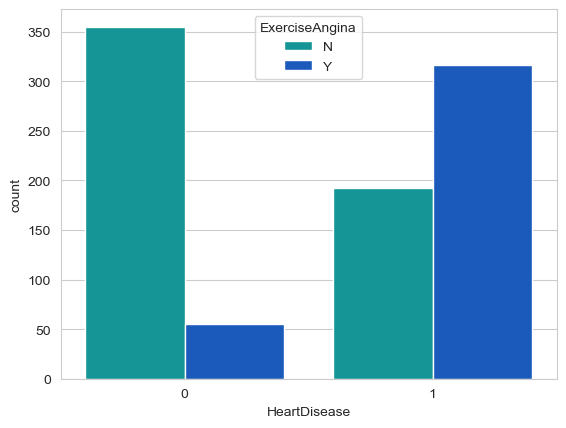

In [11]:
sns.countplot(x="HeartDisease",data=heart_f,hue="ExerciseAngina",palette="winter_r")
#most people with no heart disease are of N -excerciseAngina category

<Axes: xlabel='HeartDisease', ylabel='count'>

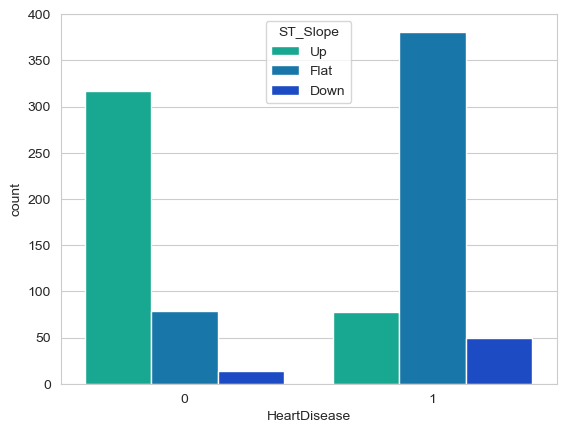

In [12]:
sns.countplot(x="HeartDisease",data=heart_f,hue="ST_Slope",palette="winter_r")
#most from 0 category have UP ST_Slop
#most from 1 category have Flat 

In [13]:
#converting categorical columns into dummy variables
cat_feat = ["Sex","ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
heart_f = pd.get_dummies(heart_f,columns=cat_feat,drop_first = True)

In [14]:
heart_f.info()
#categorical columns have been converted into dummy variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

In [15]:
#data split
X = heart_f.drop("HeartDisease",axis=1)
y = heart_f["HeartDisease"]

In [16]:
#data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [18]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [19]:
#training the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
#testing model
predictions_dtree = dtree.predict(X_test)

In [22]:
#metrics for decision tree model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_dtree))
print(confusion_matrix(y_test,predictions_dtree))
#for this particular model we need high recall, reduced false negatives, it should detect the heart disease so it can be treated
#False Negatives =28

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       123
           1       0.78      0.82      0.80       153

    accuracy                           0.77       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.77      0.77      0.77       276

[[ 88  35]
 [ 28 125]]


In [23]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [24]:
#training model
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
predictions_rfc = rfc.predict(X_test)

In [27]:
print(classification_report(y_test,predictions_rfc))
print(confusion_matrix(y_test,predictions_rfc))
#very high recall and low False Negatives(10) as compared to 28 of decision tree 
#random forest model is more suited for Heart disease prediction

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       123
           1       0.87      0.93      0.90       153

    accuracy                           0.88       276
   macro avg       0.89      0.88      0.88       276
weighted avg       0.89      0.88      0.88       276

[[101  22]
 [ 10 143]]
